In [5]:
!python prepare_dataset.py

/work/yuefengpeng_umass_edu/exp/RAG_MIA/datasets/scifact.zip: 100%|█| 2.69M/2.69
Saved 1000 mem and 1000 non-mem indices for scifact in datasets/scifact/selected_indices.json


In [3]:
!python run_mia.py --config ./configs/nfcorpus.yml

nohup: ignoring input and redirecting stderr to stdout


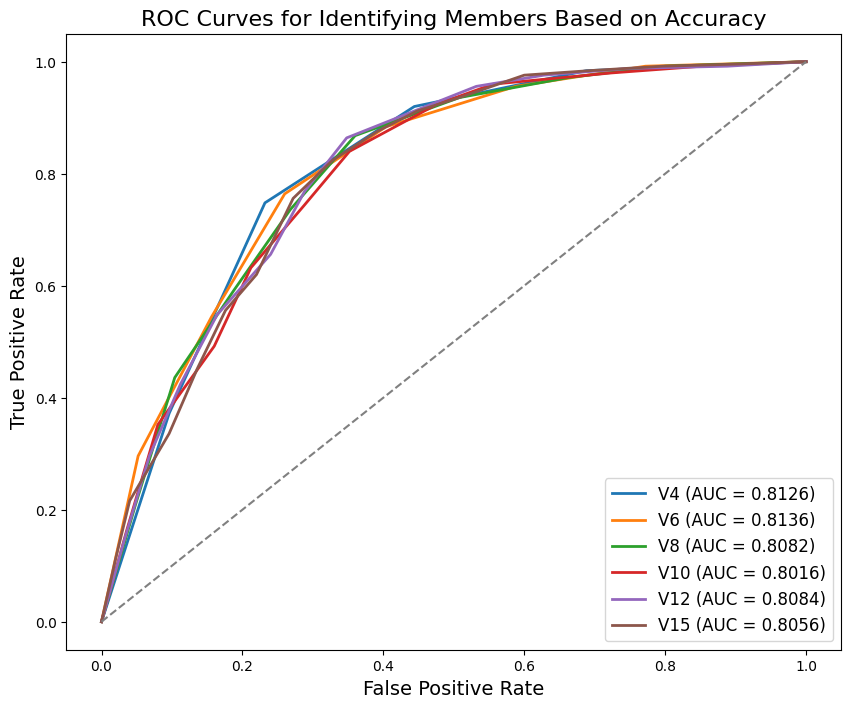

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
import json
import json
import re

def extract_yes_no(answer):
    """Extract 'Yes' or 'No' from a response."""
    match = re.search(r'\b(Yes|No)\b', answer, re.IGNORECASE)
    return match.group(1).capitalize() if match else "Unknown"

def get_mia_scores(data):
    all_acc=[]
    for doc_id, doc_data in data.items():

        correct_answers = doc_data['answers']
        llm_responses = doc_data['llm_responses']
        total_questions = len(correct_answers)
        correct_count = 0

        # Compare LLM responses with correct answers
        for i in range(total_questions):
            # Extract 'Yes' or 'No' from both the LLM response and the correct answer
            correct_answer = extract_yes_no(correct_answers[i])
            llm_answer = extract_yes_no(llm_responses[i])

            if correct_answer == llm_answer:
                correct_count += 1

        # Calculate accuracy for the document
        accuracy = correct_count / total_questions * 100
        all_acc.append(accuracy)
    return all_acc


output_dir = 'results/target_docs'
dataset = 'trec-covid'

plt.figure(figsize=(10, 8))  # Create a single figure for all plots

for i in [4,6,8,10,12,15]:
    output_file = f'{output_dir}/mia-trec-covid-llama3-gte-R3-Top{i}-M250-N15.json'
    with open(output_file, 'r') as f:
        data = json.load(f)

    # Assuming get_mia_scores is a function that extracts the relevant scores
    all_acc = get_mia_scores(data)
    mem_acc = all_acc[:len(all_acc)//2]
    nonmem_acc = all_acc[len(all_acc)//2:]

    # Generate labels: 1 for members, 0 for non-members
    labels = np.concatenate([np.ones(len(mem_acc)), np.zeros(len(nonmem_acc))])
    scores = np.concatenate([mem_acc, nonmem_acc])

    # Calculate FPR, TPR, and AUC
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current 'top'
    plt.plot(fpr, tpr, lw=2, label=f'V{i} (AUC = {roc_auc:.4f})')

# Add plot details
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Identifying Members Based on Accuracy', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

# Show the plot
plt.show()


# S2

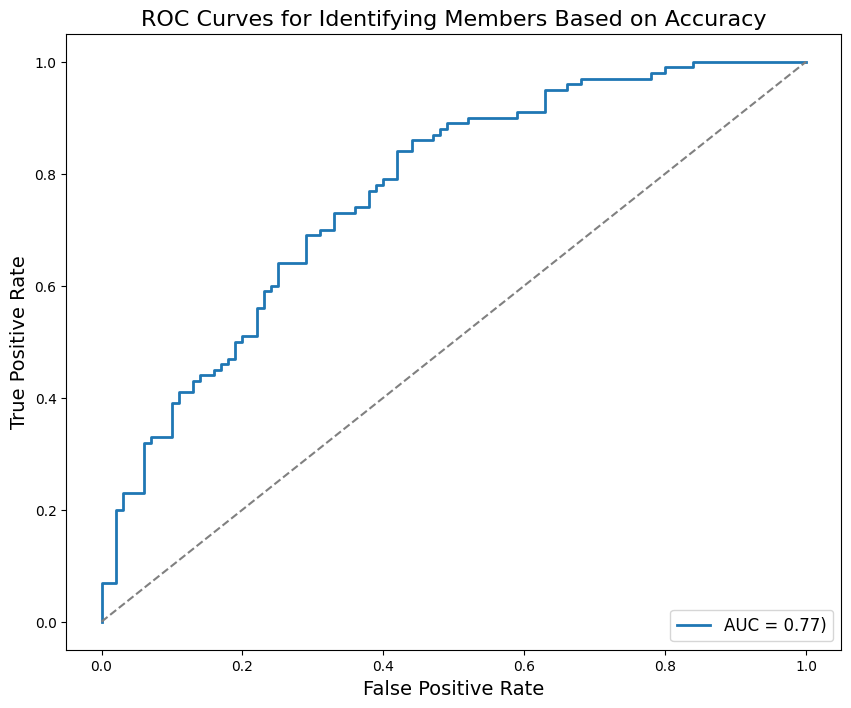

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
import json

output_dir = 'results/target_docs'
dataset = 'nfcorpus'

def get_mia_scores(data):
    all_acc=[]
    for doc_id, doc_data in data.items():

        all_acc.append(doc_data['bleu_score'])
    return all_acc

plt.figure(figsize=(10, 8))  # Create a single figure for all plots

output_file = f'{output_dir}/s2-{dataset}-llama3-Top2-M100-N15.json'
with open(output_file, 'r') as f:
    data = json.load(f)

# Assuming get_mia_scores is a function that extracts the relevant scores
all_acc = get_mia_scores(data)
mem_acc = all_acc[:len(all_acc)//2]
nonmem_acc = all_acc[len(all_acc)//2:]

# Generate labels: 1 for members, 0 for non-members
labels = np.concatenate([np.ones(len(mem_acc)), np.zeros(len(nonmem_acc))])
scores = np.concatenate([mem_acc, nonmem_acc])

# Calculate FPR, TPR, and AUC
fpr, tpr, _ = roc_curve(labels, scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve for the current 'top'
plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f})')

# Add plot details
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Identifying Members Based on Accuracy', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

# Show the plot
plt.show()


# Analysis

In [2]:
import json
import re

output_dir = 'results/target_docs'


def extract_yes_no(answer):
    """Extract 'Yes' or 'No' from a response."""
    match = re.search(r'\b(Yes|No)\b', answer, re.IGNORECASE)
    return match.group(1).capitalize() if match else "Unknown"

def get_mia_scores(data):
    all_acc=[]
    for doc_id, doc_data in data.items():

        correct_answers = doc_data['answers']
        llm_responses = doc_data['llm_responses']
        total_questions = len(correct_answers)
        correct_count = 0

        # Compare LLM responses with correct answers
        for i in range(total_questions):
            # Extract 'Yes' or 'No' from both the LLM response and the correct answer
            correct_answer = extract_yes_no(correct_answers[i])
            llm_answer = extract_yes_no(llm_responses[i])

            if correct_answer == llm_answer:
                correct_count += 1

        # Calculate accuracy for the document
        accuracy = correct_count / total_questions * 100
        all_acc.append(accuracy)
    return all_acc


In [3]:

output_file = f'{output_dir}/mia-nfcorpus-llama3-Top15-M250-N15-R3.json'
with open(output_file, 'r') as f:
    data = json.load(f)
    
all_acc = get_mia_scores(data)
mem_acc = all_acc[:len(all_acc)//2]
nonmem_acc = all_acc[len(all_acc)//2:]

import matplotlib.pyplot as plt

# Assuming mem_acc and nonmem_acc are already defined as in your code
plt.figure(figsize=(8, 6))

# Plot histograms for member and non-member accuracies
plt.hist(mem_acc, bins=20, alpha=0.5, label='Member', edgecolor='black')
plt.hist(nonmem_acc, bins=20, alpha=0.5, label='Non-member', edgecolor='black')

# Labeling
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Member and Non-member Accuracies')
plt.legend(fontsize=14)

# Show the plot
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'results/target_docs/mia-nfcorpus-llama3-Top15-M250-N15-R3.json'

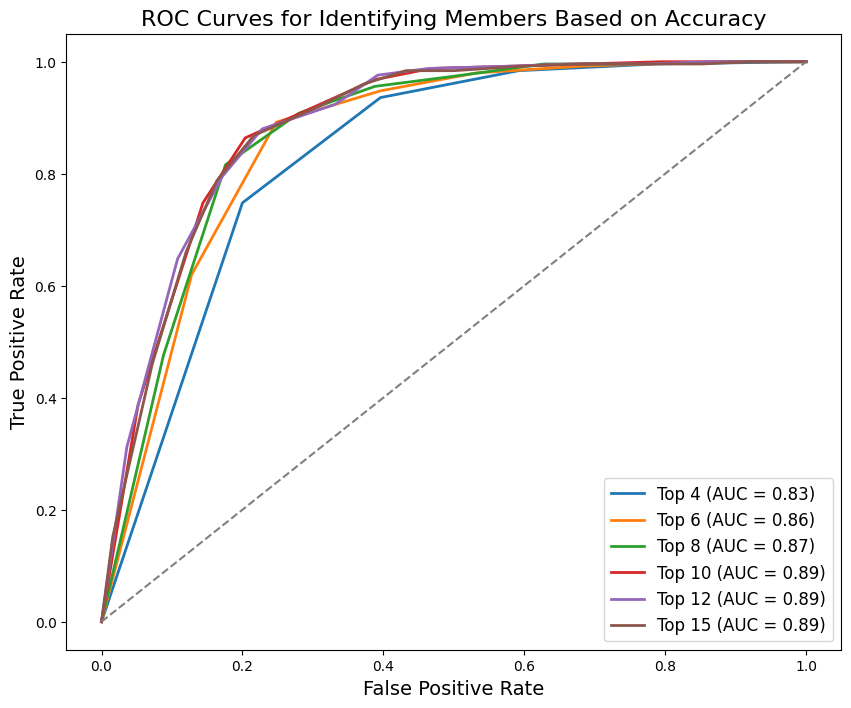

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
import json

output_dir = 'results/target_docs'
dataset = 'trec-covid'

plt.figure(figsize=(10, 8))  # Create a single figure for all plots

for top in [4, 6, 8, 10, 12, 15]:
    output_file = f'{output_dir}/mia-{dataset}-llama3-Top{top}-M250-N15.json'
    with open(output_file, 'r') as f:
        data = json.load(f)

    # Assuming get_mia_scores is a function that extracts the relevant scores
    all_acc = get_mia_scores(data)
    mem_acc = all_acc[:len(all_acc)//2]
    nonmem_acc = all_acc[len(all_acc)//2:]

    # Generate labels: 1 for members, 0 for non-members
    labels = np.concatenate([np.ones(len(mem_acc)), np.zeros(len(nonmem_acc))])
    scores = np.concatenate([mem_acc, nonmem_acc])

    # Calculate FPR, TPR, and AUC
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current 'top'
    plt.plot(fpr, tpr, lw=2, label=f'Top {top} (AUC = {roc_auc:.2f})')

# Add plot details
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Identifying Members Based on Accuracy', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

# Show the plot
plt.show()


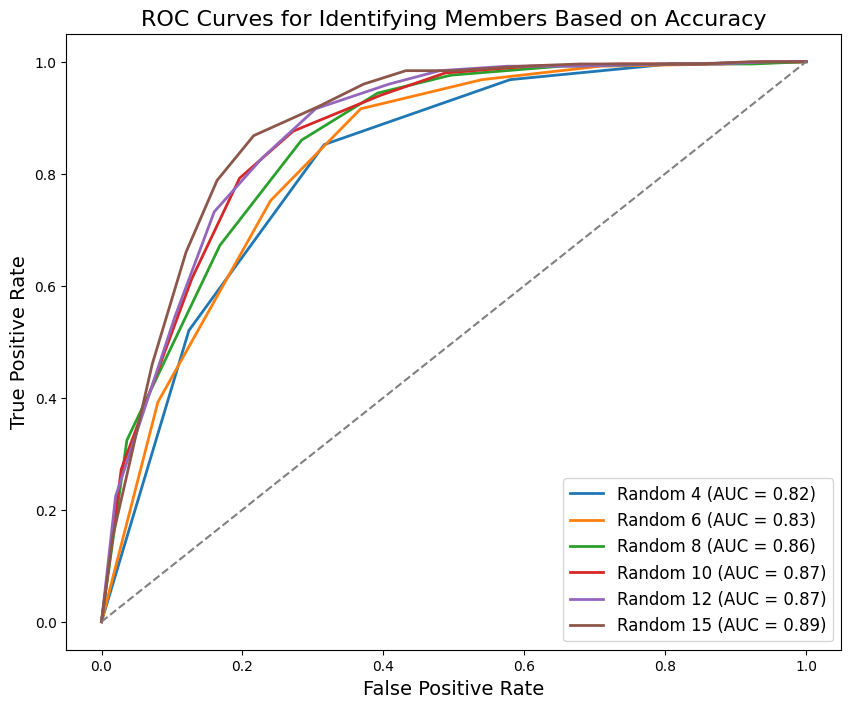

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
import json

output_dir = 'results/target_docs'
dataset = 'trec-covid'
plt.figure(figsize=(10, 8))  # Create a single figure for all plots

for top in [4, 6, 8, 10, 12, 15]:
    output_file = f'{output_dir}/random-mia-{dataset}-llama3-Top{top}-M250-N15.json'
    with open(output_file, 'r') as f:
        data = json.load(f)

    # Assuming get_mia_scores is a function that extracts the relevant scores
    all_acc = get_mia_scores(data)
    mem_acc = all_acc[:len(all_acc)//2]
    nonmem_acc = all_acc[len(all_acc)//2:]

    # Generate labels: 1 for members, 0 for non-members
    labels = np.concatenate([np.ones(len(mem_acc)), np.zeros(len(nonmem_acc))])
    scores = np.concatenate([mem_acc, nonmem_acc])

    # Calculate FPR, TPR, and AUC
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current 'top'
    plt.plot(fpr, tpr, lw=2, label=f'Random {top} (AUC = {roc_auc:.2f})')

# Add plot details
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Identifying Members Based on Accuracy', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

# Show the plot
plt.show()

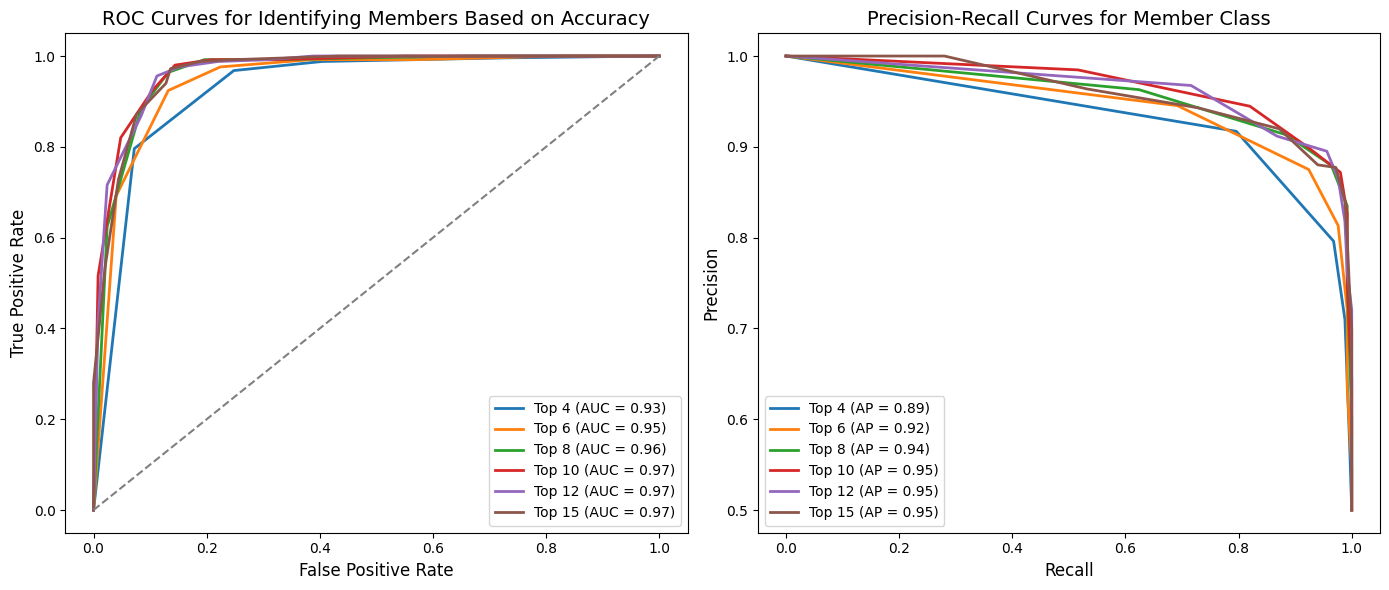

Top 4:
  Accuracy: 79.20%
  Precision: 0.71
  Recall: 0.99
  F1 Score: 0.83

Top 6:
  Accuracy: 87.60%
  Precision: 0.81
  Recall: 0.98
  F1 Score: 0.89

Top 8:
  Accuracy: 83.00%
  Precision: 0.75
  Recall: 0.99
  F1 Score: 0.85

Top 10:
  Accuracy: 91.80%
  Precision: 0.87
  Recall: 0.98
  F1 Score: 0.92

Top 12:
  Accuracy: 91.20%
  Precision: 0.87
  Recall: 0.98
  F1 Score: 0.92

Top 15:
  Accuracy: 90.00%
  Precision: 0.84
  Recall: 0.99
  F1 Score: 0.91



In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, accuracy_score, f1_score
import numpy as np
import json

output_dir = 'results/target_docs'

plt.figure(figsize=(14, 6))  # Create a figure with subplots for ROC and Precision-Recall curves

# Create subplots for ROC and Precision-Recall curves
plt.subplot(1, 2, 1)  # Subplot for ROC curve

# Dictionaries to store metrics
metrics_at_recall_98 = {}

for top in [4, 6, 8, 10, 12, 15]:
    output_file = f'{output_dir}/nfcorpus-llama3-Top{top}-M250-N15.json'
    with open(output_file, 'r') as f:
        data = json.load(f)

    # Assuming get_mia_scores is a function that extracts the relevant scores
    all_acc = get_mia_scores(data)
    mem_acc = all_acc[:len(all_acc)//2]
    nonmem_acc = all_acc[len(all_acc)//2:]

    # Generate labels: 1 for members, 0 for non-members
    labels = np.concatenate([np.ones(len(mem_acc)), np.zeros(len(nonmem_acc))])
    scores = np.concatenate([mem_acc, nonmem_acc])

    # Calculate FPR, TPR, and AUC for ROC
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Top {top} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Identifying Members Based on Accuracy', fontsize=14)
plt.legend(loc="lower right", fontsize=10)

# Subplot for Precision-Recall curve
plt.subplot(1, 2, 2)

for top in [4, 6, 8, 10, 12, 15]:
    output_file = f'{output_dir}/nfcorpus-llama3-Top{top}-M250-N15.json'
    with open(output_file, 'r') as f:
        data = json.load(f)

    # Assuming get_mia_scores is a function that extracts the relevant scores
    all_acc = get_mia_scores(data)
    mem_acc = all_acc[:len(all_acc)//2]
    nonmem_acc = all_acc[len(all_acc)//2:]

    # Generate labels: 1 for members, 0 for non-members
    labels = np.concatenate([np.ones(len(mem_acc)), np.zeros(len(nonmem_acc))])
    scores = np.concatenate([mem_acc, nonmem_acc])

    # Calculate Precision-Recall curve and AUC
    precision, recall, thresholds = precision_recall_curve(labels, scores)
    average_precision = average_precision_score(labels, scores)
    plt.plot(recall, precision, lw=2, label=f'Top {top} (AP = {average_precision:.2f})')

    # Find the point where recall is closest to 0.98
    target_recall = 0.98
    closest_index = np.argmin(np.abs(recall - target_recall))
    
    # Metrics at recall = 0.98
    precision_at_recall = precision[closest_index]
    recall_at_recall = recall[closest_index]  # Should be approximately 0.98
    threshold = thresholds[closest_index] if closest_index < len(thresholds) else thresholds[-1]
    predictions_at_recall = (scores >= threshold).astype(int)
    accuracy_at_recall = accuracy_score(labels, predictions_at_recall) * 100
    f1_at_recall = f1_score(labels, predictions_at_recall, pos_label=1, zero_division=0)

    # Store metrics
    metrics_at_recall_98[top] = {
        "accuracy": accuracy_at_recall,
        "precision": precision_at_recall,
        "recall": recall_at_recall,
        "f1": f1_at_recall
    }

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves for Member Class', fontsize=14)
plt.legend(loc="lower left", fontsize=10)

# Show the plots
plt.tight_layout()
plt.show()

# Report metrics for each top
for top in [4, 6, 8, 10, 12, 15]:
    metrics = metrics_at_recall_98[top]
    print(f"Top {top}:")
    print(f"  Accuracy: {metrics['accuracy']:.2f}%")
    print(f"  Precision: {metrics['precision']:.2f}")
    print(f"  Recall: {metrics['recall']:.2f}")
    print(f"  F1 Score: {metrics['f1']:.2f}\n")


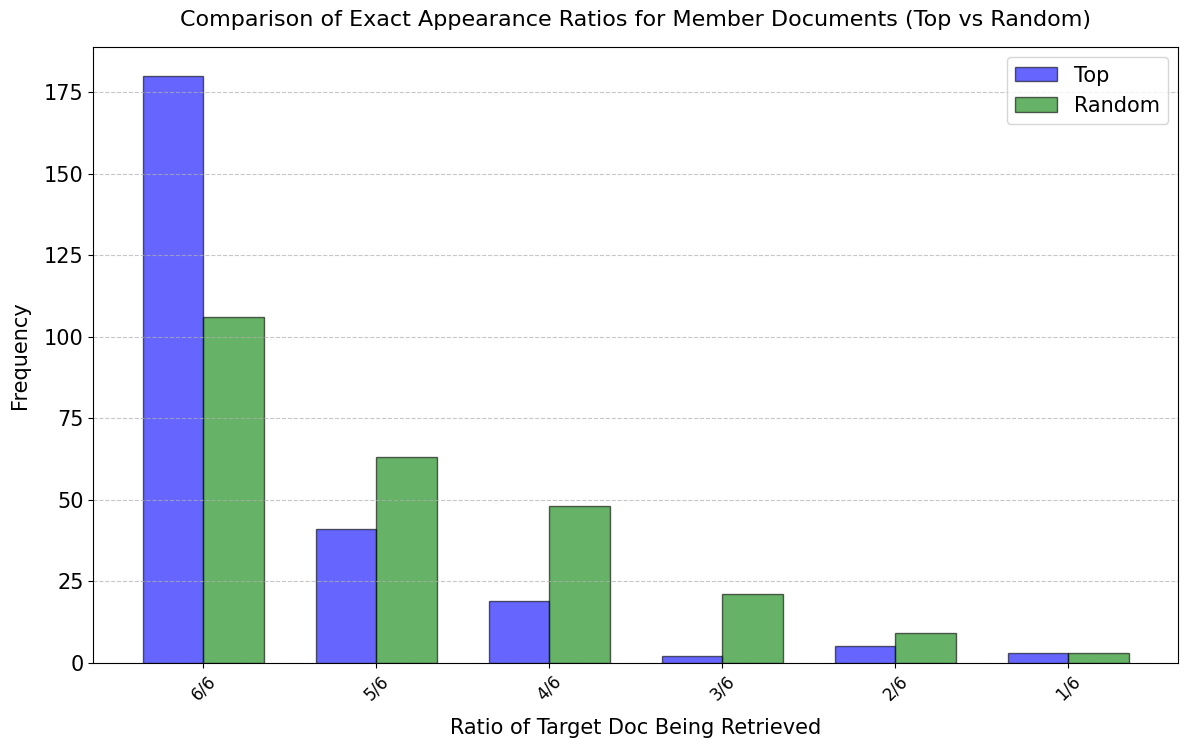

In [39]:
import json
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

output_dir = 'results/target_docs'
output_file_top = f'{output_dir}/mia-trec-covid-llama3-Top6-M250-N15.json'
output_file_random = f'{output_dir}/random-mia-trec-covid-llama3-Top6-M250-N15.json'

def process_file(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)

    exact_counts = Counter()
    for target_doc, item in data.items():
        if item.get("mem") == "yes":
            retrieved_doc_lists = item["retrieved_doc_ids"]
            count_in_retrieved = sum(1 for docs in retrieved_doc_lists if target_doc in docs)
            total_questions = len(retrieved_doc_lists)
            exact_counts[f"{count_in_retrieved}/{total_questions}"] += 1

    return exact_counts

# Process both files
exact_counts_top = process_file(output_file_top)
exact_counts_random = process_file(output_file_random)

# Combine keys to ensure alignment between the two datasets
all_labels = sorted(set(exact_counts_top.keys()).union(set(exact_counts_random.keys())), key=lambda x: int(x.split('/')[0]), reverse=True)
values_top = [exact_counts_top.get(label, 0) for label in all_labels]
values_random = [exact_counts_random.get(label, 0) for label in all_labels]

# Create positions for the bars
x = np.arange(len(all_labels))
width = 0.35  # width of the bars

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(x - width/2, values_top, width, label='Top', color='blue', edgecolor='black', alpha=0.6)
plt.bar(x + width/2, values_random, width, label='Random', color='green', edgecolor='black', alpha=0.6)

plt.xlabel('Ratio of Target Doc Being Retrieved', fontsize=15, labelpad=10)
plt.ylabel('Frequency', fontsize=15, labelpad=10)
plt.title('Comparison of Exact Appearance Ratios for Member Documents (Top vs Random)', fontsize=16, pad=15)
plt.xticks(x, all_labels, rotation=45, fontsize=12)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
